<b>다중분류</b><br>
폴더, 파일명에 라벨 포함<br>
폴더, 파일명에서 클래스 정보 추출 <br><br>

산, 바다, 자전거 구분

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

In [ ]:
import math
import numpy as np
from glob import glob
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
IMG_CHANNELS = 3
IMG_ROWS = 64
IMG_COLS = 64
CLASSES = 3  # 산, 바다, 자전거

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 파일 경로
mountain_files = glob('/content/drive/MyDrive/CNN/m.s_test/m/*jpg')
sea_files = glob('/content/drive/MyDrive/CNN/m.s_test/s/*jpg')
bicycle_files = glob('/content/drive/MyDrive/CNN/b_e/b/*jpg')


In [ ]:

# 이미지와 라벨을 불러오는 함수 정의
def load_images_and_labels(files, label):
    images = [image.load_img(p, target_size=(IMG_ROWS, IMG_COLS)) for p in files]
    labels = [label] * len(files)
    return images, labels

# 산과 바다 이미지 및 라벨 불러오기
mountain_images, mountain_labels = load_images_and_labels(mountain_files, 0)  # 산을 0으로 라벨링
sea_images, sea_labels = load_images_and_labels(sea_files, 1)  # 바다를 1로 라벨링
b_images, b_labels = load_images_and_labels(bicycle_files, 2)  # 자전거를 2로 라벨링

# 이미지와 라벨 병합
images = mountain_images + sea_images + b_images
y = mountain_labels + sea_labels + b_labels

In [ ]:
#define the convnet
def build(input_shape, classes):
    model = models.Sequential()
    model.add(layers.Convolution2D(32, (3, 3), activation='relu',
                        input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(classes, activation='softmax'))
    return model

In [ ]:
# 이미지 벡터화
image_vector = np.asarray([image.img_to_array(img) for img in images])

In [ ]:
image_vector[0]

In [ ]:
image_vector.shape

(374, 64, 64, 3)

In [ ]:
image_vector[0].shape

(64, 64, 3)

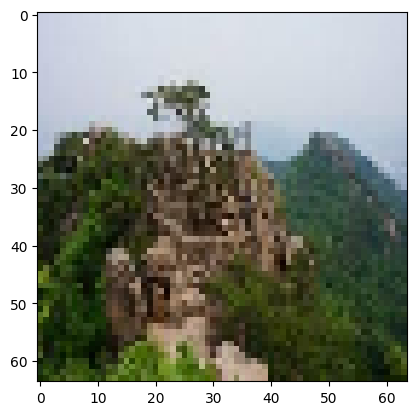

In [ ]:
plt.imshow(image_vector[0]/255)

In [ ]:
# y=[1] * 1000 + [0] * 1000

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_vector, y, test_size=0.20, random_state=0)

In [ ]:
X_train.shape

(16, 64, 64, 3)

In [ ]:
X_train, X_test = X_train / 255, X_test / 255
# convert to categorical
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)

In [ ]:
y_train[10]

In [ ]:
model=build((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 30752)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                984096    
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.1)

Epoch 1/50
5/5 [==============================] - 2s 150ms/step - loss: 2.2453 - accuracy: 0.6923 - val_loss: 0.4621 - val_accuracy: 0.9333
Epoch 2/50
5/5 [==============================] - 0s 82ms/step - loss: 0.4719 - accuracy: 0.8923 - val_loss: 0.8850 - val_accuracy: 0.3333
Epoch 3/50
5/5 [==============================] - 0s 75ms/step - loss: 0.3718 - accuracy: 0.7769 - val_loss: 0.2427 - val_accuracy: 0.9333
Epoch 4/50
5/5 [==============================] - 0s 82ms/step - loss: 0.1776 - accuracy: 0.8923 - val_loss: 0.3667 - val_accuracy: 0.9333
Epoch 5/50
5/5 [==============================] - 0s 81ms/step - loss: 0.2304 - accuracy: 0.9077 - val_loss: 0.2104 - val_accuracy: 0.9333
Epoch 6/50
5/5 [==============================] - 0s 78ms/step - loss: 0.1213 - accuracy: 0.9385 - val_loss: 0.2787 - val_accuracy: 0.9333
Epoch 7/50
5/5 [==============================] - 0s 82ms/step - loss: 0.1662 - accuracy: 0.9231 - val_loss: 0.1854 - val_accuracy: 0.9333
Epoch 8/50
5/5 [==========

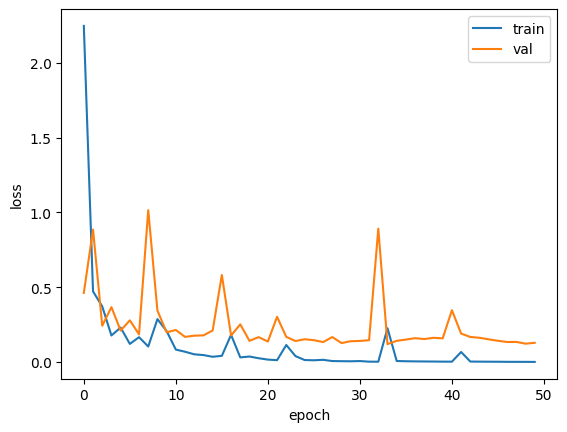

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

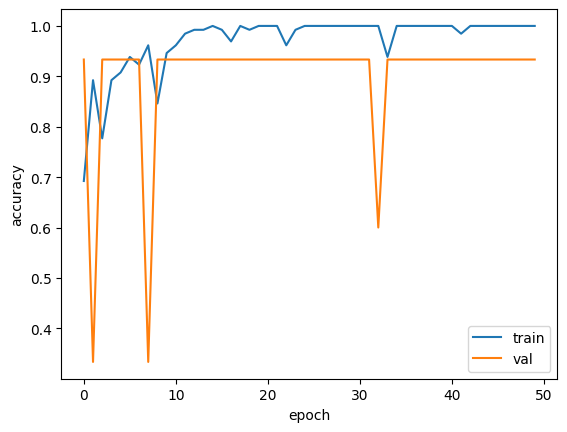

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test)
print("\nTest loss:", score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 12ms/step - loss: 0.5461 - accuracy: 0.8919

Test loss: 0.54607093334198
Test accuracy: 0.8918918967247009
